In [1]:
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy as np
import obonet
import networkx as nx


In [2]:

def read_json_to_dict(file):
    import json
    import pandas as pd
    
    # Load the JSON file (replace with your path)
    with open(file, "r") as f:
        possible_dict = json.load(f)
    
    # Initialize an empty dictionary to store DataFrames for each key
    dataframes_dict = {}
    
    # Loop through each key in the possible_dict
    for key, result in possible_dict.items():
        # Initialize an empty list to store the rows for this DataFrame
        data = []
        
        # Iterate through the list of results for each key
        for entry in result:
            # Split FgRatio and BgRatio
            fg_ratio_split = entry['FgRatio'].split('/')
            bg_ratio_split = entry['BgRatio'].split('/')
            
            # Convert the split ratios to numeric values
            fg_ratio = float(fg_ratio_split[0]) / float(fg_ratio_split[1])
            bg_ratio = float(bg_ratio_split[0]) / float(bg_ratio_split[1])
            
            # Prepare the row data with all required columns
            row = {
                'Description': entry['Description'],
                'FgRatio': fg_ratio,
                'BgRatio': bg_ratio,
                'ES': entry['ES'],
                'pvalue': entry['pvalue'],
                'FDR': entry['FDR'],
                '_row': entry['_row']
            }
            
            # Append the row to the data list
            data.append(row)
        
        # Convert the data list into a DataFrame
        df = pd.DataFrame(data)
        
        # Store the DataFrame in the dictionary with the key as its name
        dataframes_dict[key] = df
    return dataframes_dict


In [3]:
#EEN Communities Comparison

In [3]:
#Louvain
with open('output/Communities/Louvain/weighted_ji_fine_grained_communities_dict.pickle', 'rb') as handle:
    louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_middle_communities_dict.pickle', 'rb') as handle:
    louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_broad_communities_dict.pickle', 'rb') as handle:
    louvain_broad_exposures = pk.load(handle)


#Random Louvain

with open('output/Communities/Louvain/random_fine_grained_communities_dict.pickle', 'rb') as handle:
    random_louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Louvain/random_middle_communities_dict.pickle', 'rb') as handle:
    random_louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Louvain/random_broad_communities_dict.pickle', 'rb') as handle:
    random_louvain_broad_exposures = pk.load(handle)


#Infomap
with open('output/Communities/Infomap/ji_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_middle_communities_dict.pickle', 'rb') as handle:
    infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_broad_communities_dict.pickle', 'rb') as handle:
    infomap_broad_exposures = pk.load(handle)


#Random Infomap

with open('output/Communities/Infomap/random_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    random_infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Infomap/random_infomap_middle_communities_dict.pickle', 'rb') as handle:
    random_infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Infomap/random_infomap_broad_communities_dict.pickle', 'rb') as handle:
    random_infomap_broad_exposures = pk.load(handle)



/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_98059/3214934164.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


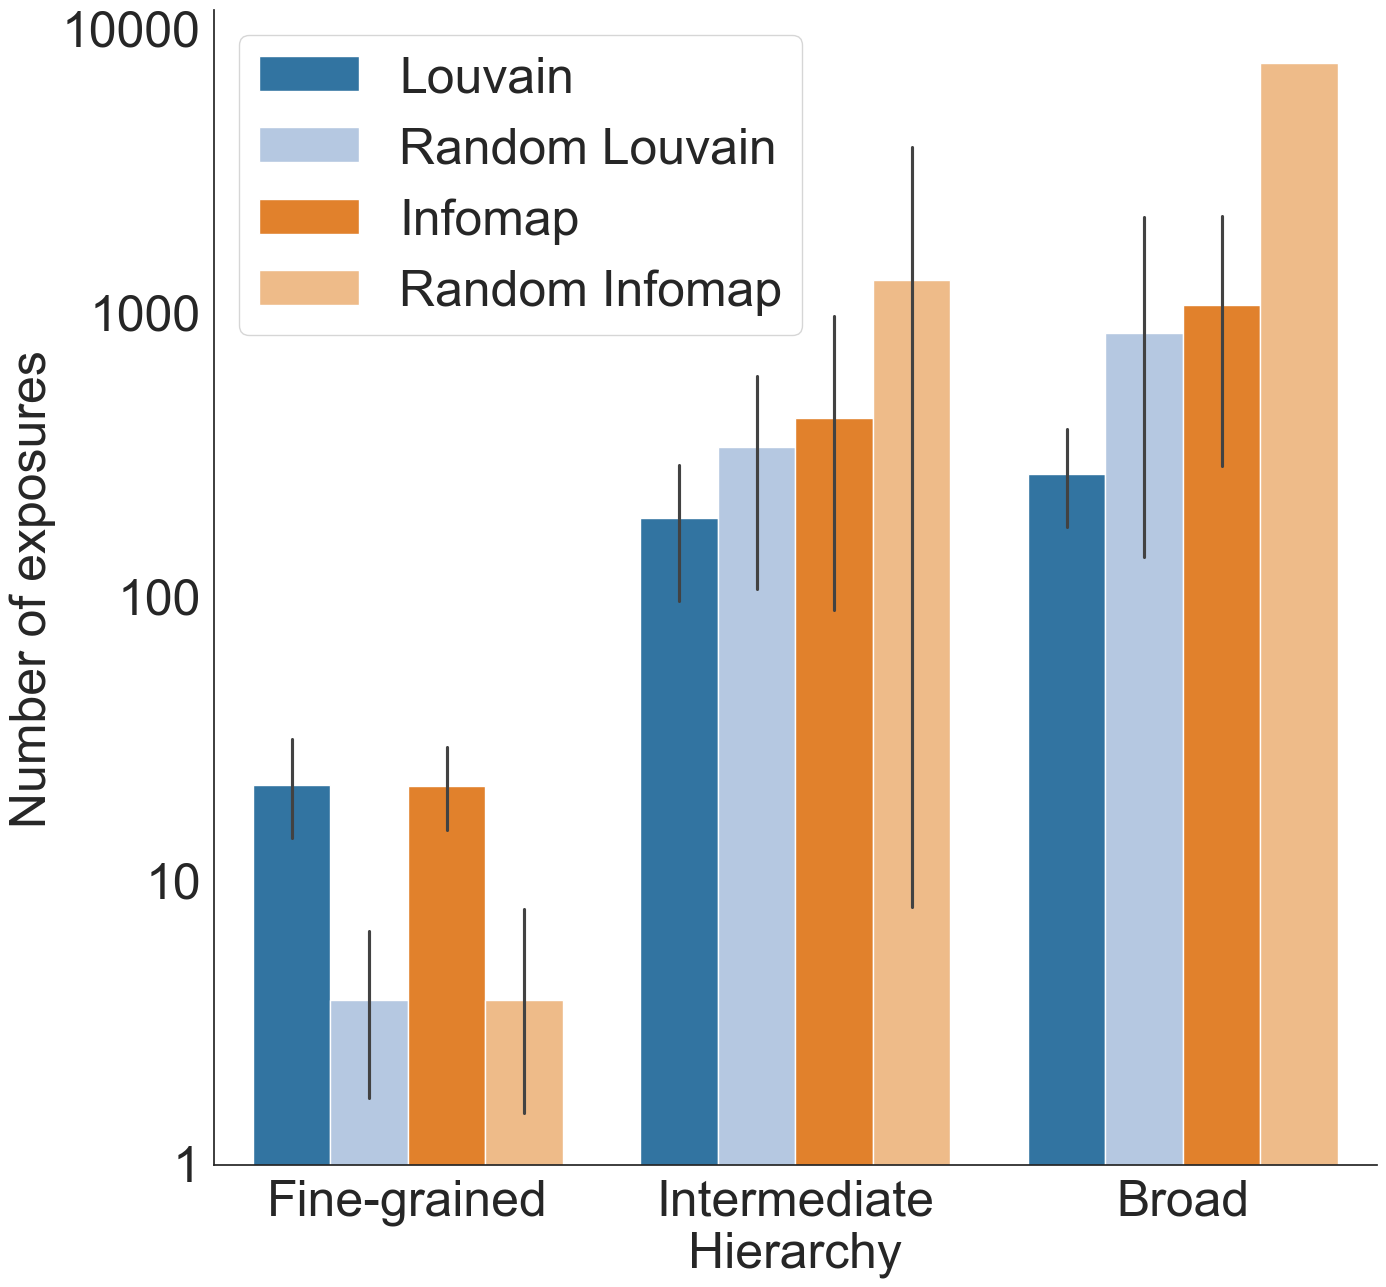

In [5]:


com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")
    

com_size_df['Hierarchy']=status_list
com_size_df['Number of exposures']=num_terms_list
com_size_df['Type']=level_list

palette = {
    "Louvain": "#1f77b4",        # blue
    "Random Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "Random Infomap": "#ffbb78"  # light orange
}


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of exposures', hue='Type', data=com_size_df,palette=palette)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of exposures', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Supplementary_Number_Exposures_Network_Type.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [6]:
com_size_df["Color"] = com_size_df["Type"].map(palette)

# Append to your existing SourceData Excel
excel_path = "output/Source_Data_exposurome.xlsx"

with pd.ExcelWriter(
        excel_path,
        engine="openpyxl",
        mode="a",
        if_sheet_exists="replace"
    ) as writer:
    com_size_df.to_excel(
        writer,
        sheet_name="SF12C",
        index=False
    )

In [7]:
#Let's compare the number of genes

#Louvain
with open("output/Communities/Louvain/first_louvain_cluster_genes.json", "r") as handle:
    louvain_fine_grained_genes = json.load(handle)

with open("output/Communities/Louvain/second_louvain_cluster_genes.json", 'rb') as handle:
    louvain_middle_genes = json.load(handle)

with open("output/Communities/Louvain/third_louvain_cluster_genes.json", 'rb') as handle:
    louvain_broad_genes = json.load(handle)


#Random Louvain

with open("output/Communities/Louvain/random_first_louvain_cluster_genes.json", "r") as handle:
    random_louvain_fine_grained_genes = json.load(handle)

with open('output/Communities/Louvain/random_second_louvain_cluster_genes.json', 'rb') as handle:
    random_louvain_middle_genes = json.load(handle)

with open('output/Communities/Louvain/random_third_louvain_cluster_genes.json', 'rb') as handle:
    random_louvain_broad_genes = json.load(handle)


#Infomap
with open("output/Communities/Infomap/first_infomap_cluster_genes.json", "r") as handle:
    infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Infomap/second_infomap_cluster_genes.json", "r") as handle:
    infomap_middle_genes = json.load(handle)

with open("output/Communities/Infomap/third_infomap_cluster_genes.json", "r") as handle:
    infomap_broad_genes = json.load(handle)


#Random Infomap

with open("output/Communities/Infomap/random_first_infomap_cluster_genes.json", "r") as handle:
    random_infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Infomap/random_second_infomap_cluster_genes.json", "r") as handle:
    random_infomap_middle_genes = json.load(handle)

with open("output/Communities/Infomap/random_third_infomap_cluster_genes.json", "r") as handle:
    random_infomap_broad_genes = json.load(handle)



/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_98059/2458248617.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


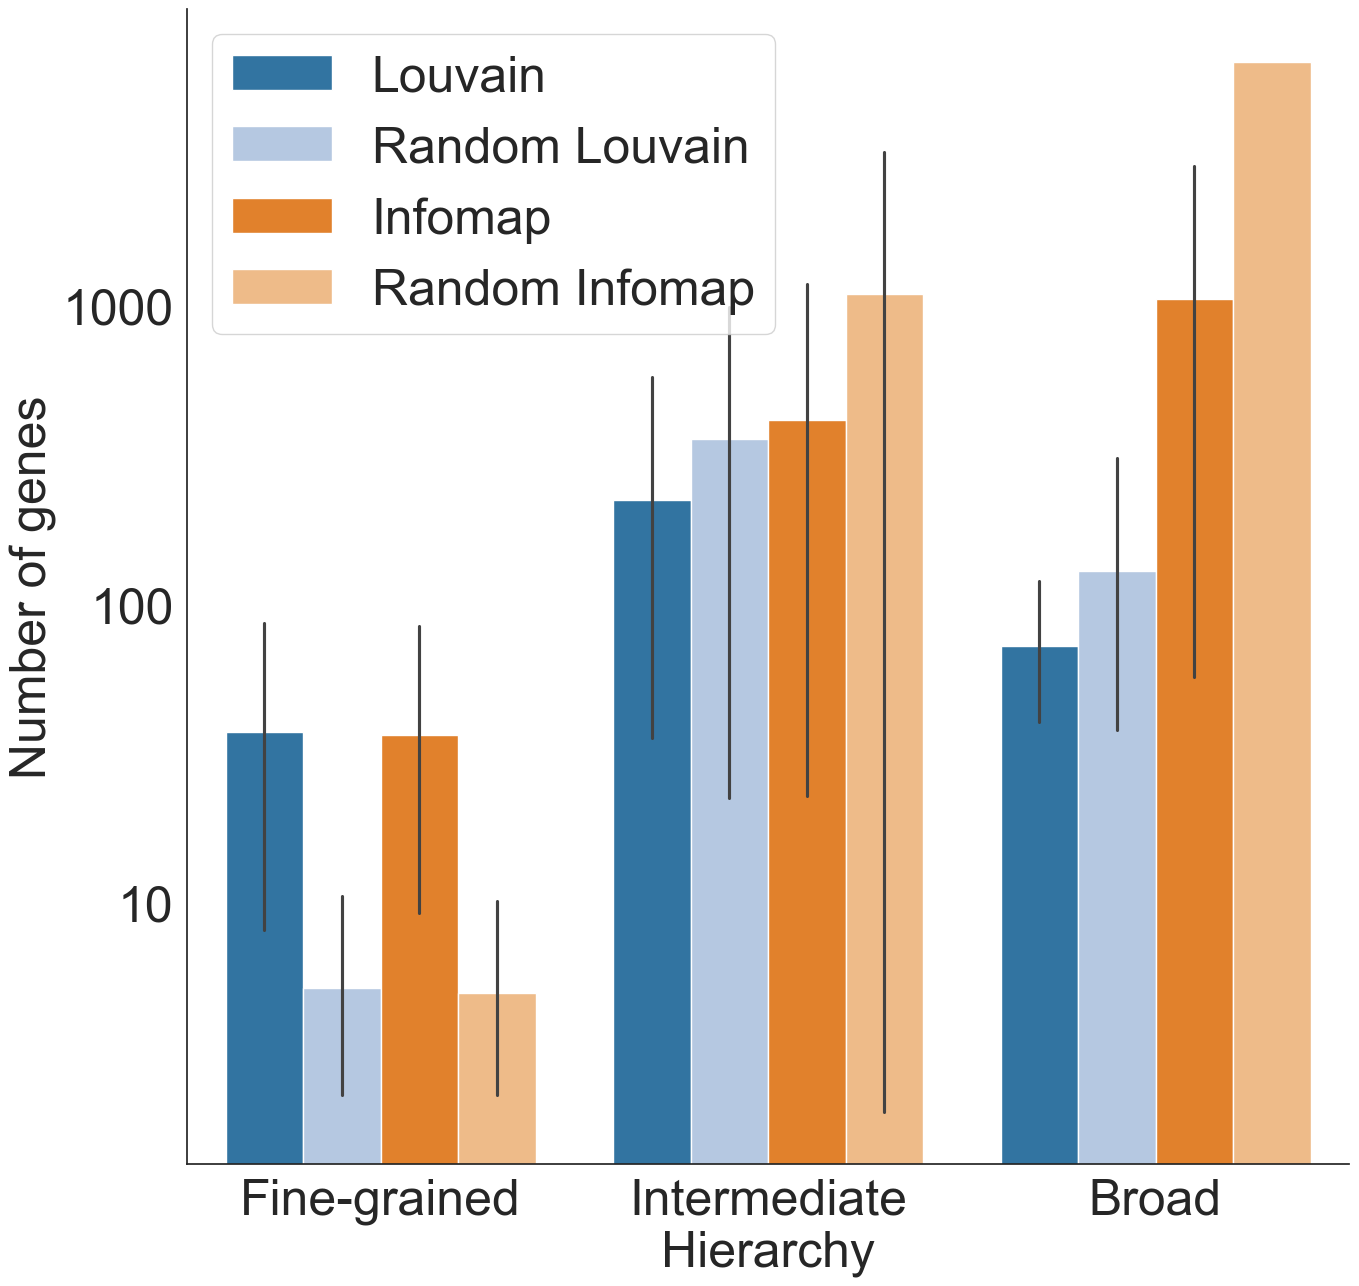

In [8]:

com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in random_louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in random_infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")
    

com_size_df['Hierarchy']=status_list
com_size_df['Number of genes']=num_terms_list
com_size_df['Type']=level_list

palette = {
    "Louvain": "#1f77b4",        # blue
    "Random Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "Random Infomap": "#ffbb78"  # light orange
}


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of genes', hue='Type',estimator=np.mean, data=com_size_df, palette=palette)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of genes', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Supplementary_Number_genes_Network_Type.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [9]:
com_size_df["Color"] = com_size_df["Type"].map(palette)

# Append to your existing SourceData Excel
excel_path = "output/Source_Data_exposurome.xlsx"

with pd.ExcelWriter(
        excel_path,
        engine="openpyxl",
        mode="a",
        if_sheet_exists="replace"
    ) as writer:
    com_size_df.to_excel(
        writer,
        sheet_name="SF12D",
        index=False
    )

In [10]:
#Let's compare the enrichment now

# Random
random_first_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/random_first_louvain_ora_dict.json")
random_second_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/random_second_louvain_cluster_ora_dict.json")
random_third_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/random_third_louvain_cluster_ora_dict.json")

# Louvain

first_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/first_louvain_ora_dict.json")
second_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/second_louvain_cluster_ora_dict.json")
third_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/third_louvain_cluster_ora_dict.json")

# Infomap

first_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/first_infomap_ora_dict.json")
second_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/second_infomap_cluster_ora_dict.json")
third_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/third_infomap_cluster_ora_dict.json")

# Random Infomap
random_first_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_first_infomap_ora_dict.json")
random_second_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_second_infomap_cluster_ora_dict.json")
random_third_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_third_infomap_cluster_ora_dict.json")

In [11]:
sig_go_first_random_louvain_ora_dict = {}
sig_go_first_louvain_ora_dict = {}

for com,enr_df in random_first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_random_louvain_ora_dict[com] = go_list

for com,enr_df in first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_louvain_ora_dict[com] = go_list

sig_go_second_random_louvain_ora_dict = {}
sig_go_second_louvain_ora_dict = {}

for com,enr_df in random_second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_random_louvain_ora_dict[com] = go_list

for com,enr_df in second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_louvain_ora_dict[com] = go_list

sig_go_third_random_louvain_ora_dict = {}
sig_go_third_louvain_ora_dict = {}

for com,enr_df in random_third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_random_louvain_ora_dict[com] = go_list

for com,enr_df in third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_louvain_ora_dict[com] = go_list


sig_go_first_random_infomap_ora_dict = {}
sig_go_first_infomap_ora_dict = {}

for com,enr_df in random_first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_random_infomap_ora_dict[com] = go_list

for com,enr_df in first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_infomap_ora_dict[com] = go_list

sig_go_second_random_infomap_ora_dict = {}
sig_go_second_infomap_ora_dict = {}

for com,enr_df in random_second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_random_infomap_ora_dict[com] = go_list

for com,enr_df in second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_infomap_ora_dict[com] = go_list

sig_go_third_random_infomap_ora_dict = {}
sig_go_third_infomap_ora_dict = {}

for com,enr_df in random_third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_random_infomap_ora_dict[com] = go_list

for com,enr_df in third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_infomap_ora_dict[com] = go_list

In [ ]:
#Let's plot the percentage of communities with no enriched terms

In [61]:
first_louvain_go_missing_com = len([com for com in sig_go_first_louvain_ora_dict.keys() if len(sig_go_first_louvain_ora_dict[com])==0])/len(sig_go_first_louvain_ora_dict)
second_louvain_go_missing_com = len([com for com in sig_go_second_louvain_ora_dict.keys() if len(sig_go_second_louvain_ora_dict[com])==0])/len(sig_go_second_louvain_ora_dict)
third_louvain_go_missing_com = len([com for com in sig_go_third_louvain_ora_dict.keys() if len(sig_go_third_louvain_ora_dict[com])==0])/len(sig_go_third_louvain_ora_dict)

first_random_louvain_go_missing_com = len([com for com in sig_go_first_random_louvain_ora_dict.keys() if len(sig_go_first_random_louvain_ora_dict[com])==0])/len(sig_go_first_random_louvain_ora_dict)
second_random_louvain_go_missing_com = len([com for com in sig_go_second_random_louvain_ora_dict.keys() if len(sig_go_second_random_louvain_ora_dict[com])==0])/len(sig_go_second_random_louvain_ora_dict)
third_random_louvain_go_missing_com = len([com for com in sig_go_third_random_louvain_ora_dict.keys() if len(sig_go_third_random_louvain_ora_dict[com])==0])/len(sig_go_third_random_louvain_ora_dict)



first_infomap_go_missing_com = len([com for com in sig_go_first_infomap_ora_dict.keys() if len(sig_go_first_infomap_ora_dict[com])==0])/len(sig_go_first_infomap_ora_dict)
second_infomap_go_missing_com = len([com for com in sig_go_second_infomap_ora_dict.keys() if len(sig_go_second_infomap_ora_dict[com])==0])/len(sig_go_second_infomap_ora_dict)
third_infomap_go_missing_com = len([com for com in sig_go_third_infomap_ora_dict.keys() if len(sig_go_third_infomap_ora_dict[com])==0])/len(sig_go_third_infomap_ora_dict)

first_random_infomap_go_missing_com = len([com for com in sig_go_first_random_infomap_ora_dict.keys() if len(sig_go_first_random_infomap_ora_dict[com])==0])/len(sig_go_first_random_infomap_ora_dict)
second_random_infomap_go_missing_com = len([com for com in sig_go_second_random_infomap_ora_dict.keys() if len(sig_go_second_random_infomap_ora_dict[com])==0])/len(sig_go_second_random_infomap_ora_dict)
third_random_infomap_go_missing_com = len([com for com in sig_go_third_random_infomap_ora_dict.keys() if len(sig_go_third_random_infomap_ora_dict[com])==0])/len(sig_go_third_random_infomap_ora_dict)



print(first_louvain_go_missing_com)
print(second_louvain_go_missing_com)
print(third_louvain_go_missing_com)
print("/n")
print(first_random_louvain_go_missing_com)
print(second_random_louvain_go_missing_com)
print(third_random_louvain_go_missing_com)
print("/n")
print(first_infomap_go_missing_com)
print(second_infomap_go_missing_com)
print(third_infomap_go_missing_com)
print("/n")
print(first_random_infomap_go_missing_com)
print(second_random_infomap_go_missing_com)
print(third_random_infomap_go_missing_com)

0.6140350877192983
0.04
0.0
/n
0.7141753572808034
0.22727272727272727
0.0
/n
0.5240174672489083
0.17391304347826086
0.0
/n
0.6953004622496148
0.6666666666666666
0.0


/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_98059/767595848.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


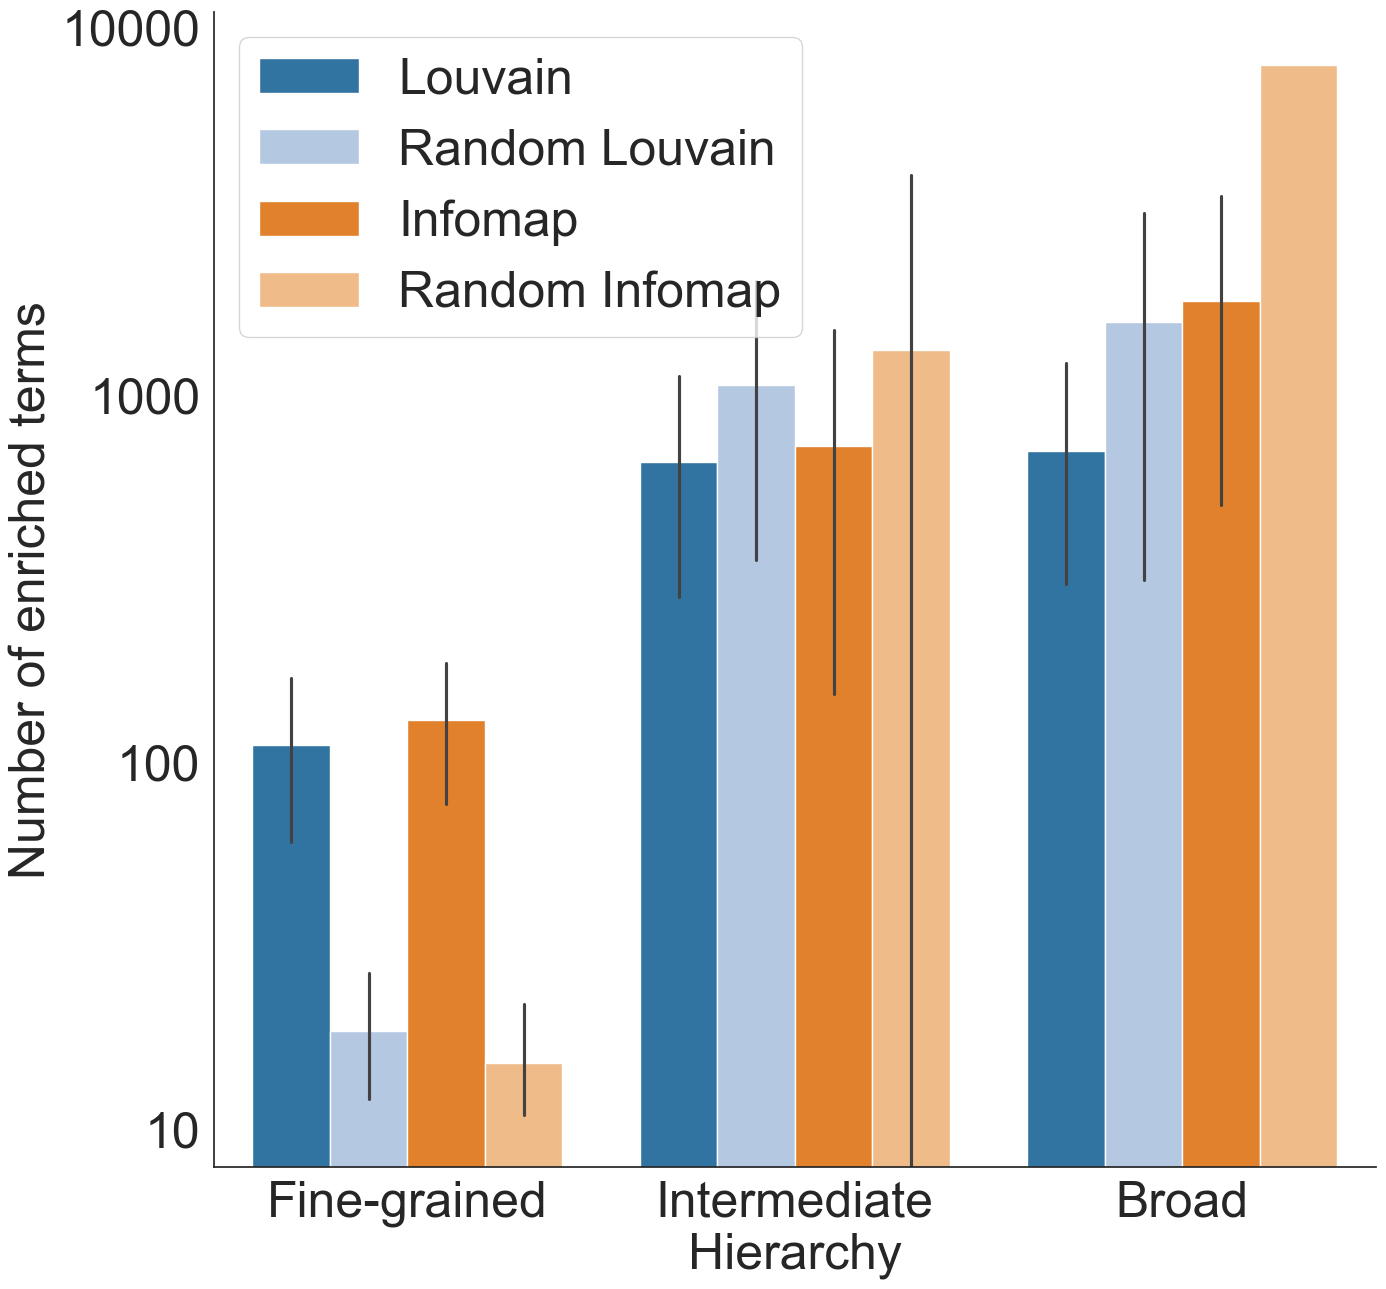

In [12]:


com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in sig_go_first_louvain_ora_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in sig_go_first_random_louvain_ora_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in sig_go_first_infomap_ora_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in sig_go_first_random_infomap_ora_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in sig_go_second_louvain_ora_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in sig_go_second_random_louvain_ora_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in sig_go_second_infomap_ora_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in sig_go_second_random_infomap_ora_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")

for com,expset in sig_go_third_louvain_ora_dict.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in sig_go_third_random_louvain_ora_dict.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Louvain")

for com,expset in sig_go_third_infomap_ora_dict.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in sig_go_third_random_infomap_ora_dict.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Random Infomap")
    

com_size_df['Hierarchy']=status_list
com_size_df['Number of enriched terms']=num_terms_list
com_size_df['Type']=level_list

palette = {
    "Louvain": "#1f77b4",        # blue
    "Random Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "Random Infomap": "#ffbb78"  # light orange
}


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of enriched terms', hue='Type',estimator=np.mean, data=com_size_df,palette=palette)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of enriched terms', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Supplementary_Number_enrichment_Network_Type.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [13]:
com_size_df["Color"] = com_size_df["Type"].map(palette)

# Append to your existing SourceData Excel
excel_path = "output/Source_Data_exposurome.xlsx"

with pd.ExcelWriter(
        excel_path,
        engine="openpyxl",
        mode="a",
        if_sheet_exists="replace"
    ) as writer:
    com_size_df.to_excel(
        writer,
        sheet_name="SF12E",
        index=False
    )

In [ ]:
# Random Infomap
random_first_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_first_infomap_ora_dict.json")
random_second_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_second_infomap_cluster_ora_dict.json")
random_third_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/random_third_infomap_cluster_ora_dict.json")

In [34]:
#Let's divide in the three GO branches


sig_enr_GOBP_random_third_louvain_ora_dict = {}
sig_enr_GOMF_random_third_louvain_ora_dict = {}
sig_enr_GOCC_random_third_louvain_ora_dict = {}
for com,enr_df in random_third_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_third_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_third_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_third_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_random_second_louvain_ora_dict = {}
sig_enr_GOMF_random_second_louvain_ora_dict = {}
sig_enr_GOCC_random_second_louvain_ora_dict = {}
for com,enr_df in random_second_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_second_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_second_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_second_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_random_first_louvain_ora_dict = {}
sig_enr_GOMF_random_first_louvain_ora_dict = {}
sig_enr_GOCC_random_first_louvain_ora_dict = {}
for com,enr_df in random_first_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_first_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_first_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_first_louvain_ora_dict[com] = gocc_list


sig_enr_GOBP_random_third_infomap_ora_dict = {}
sig_enr_GOMF_random_third_infomap_ora_dict = {}
sig_enr_GOCC_random_third_infomap_ora_dict = {}
for com,enr_df in random_third_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_third_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_third_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_third_infomap_ora_dict[com] = gocc_list

sig_enr_GOBP_random_second_infomap_ora_dict = {}
sig_enr_GOMF_random_second_infomap_ora_dict = {}
sig_enr_GOCC_random_second_infomap_ora_dict = {}
for com,enr_df in random_second_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_second_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_second_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_second_infomap_ora_dict[com] = gocc_list

sig_enr_GOBP_random_first_infomap_ora_dict = {}
sig_enr_GOMF_random_first_infomap_ora_dict = {}
sig_enr_GOCC_random_first_infomap_ora_dict = {}
for com,enr_df in random_first_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_random_first_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_random_first_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_random_first_infomap_ora_dict[com] = gocc_list



In [35]:
#Here, we will define a funnction that calculates the lcc for each set of terms in the GO tree to check for the 
#cohesiveness of the enrichment terms in each community
def lcc_significance(term_list,network):
    import random as rd
    import numpy as np
    z='nan'
    if len(set(term_list))>1:
        try:
            G_sub = nx.subgraph(network,term_list)
            G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
            f_lcc_size = G_sub_lcc.number_of_nodes()
        except:
            f_lcc_size = 1
            
        l_random_lccs = []

        S = 1000
        for s in range(S):
            term_sample = rd.sample(list(network.nodes()),len(set(term_list)))
            G_sub_rnd = nx.subgraph(network,term_sample)
            G_sub_rnd_lcc = G_sub_rnd.subgraph(max(nx.connected_components(G_sub_rnd), key=len))  # extract lcc graph
            lcc_size = G_sub_rnd_lcc.number_of_nodes()
            l_random_lccs.append(lcc_size)
        mu = np.mean(l_random_lccs)
        std = np.std(l_random_lccs)

        z = (f_lcc_size-mu)/std
    
    return z


In [36]:
#https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#C5
#
#https://data.broadinstitute.org/gsea-msigdb/msigdb/release/2023.1.Hs/
import json

def read_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Example usage:
json_file = 'c5.go.v2023.1.Hs.json'
go_gsea_file = read_json(json_file)

go_match_id_dict = {}
for key,description_dict in go_gsea_file.items():
    up_key = key.replace("_"," ")
    go_match_id_dict[up_key]= description_dict["exactSource"]



In [37]:
sig_enr_id_GOMF_random_third_louvain_ora_dict = {}
sig_enr_id_GOBP_random_third_louvain_ora_dict = {}
sig_enr_id_GOCC_random_third_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_third_louvain_ora_dict[com] = n_term_list

sig_enr_id_GOMF_random_second_louvain_ora_dict = {}
sig_enr_id_GOBP_random_second_louvain_ora_dict = {}
sig_enr_id_GOCC_random_second_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_second_louvain_ora_dict[com] = n_term_list


sig_enr_id_GOMF_random_first_louvain_ora_dict = {}
sig_enr_id_GOBP_random_first_louvain_ora_dict = {}
sig_enr_id_GOCC_random_first_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_first_louvain_ora_dict[com] = n_term_list


In [38]:

sig_enr_id_GOMF_random_third_infomap_ora_dict = {}
sig_enr_id_GOBP_random_third_infomap_ora_dict = {}
sig_enr_id_GOCC_random_third_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_third_infomap_ora_dict[com] = n_term_list

sig_enr_id_GOMF_random_second_infomap_ora_dict = {}
sig_enr_id_GOBP_random_second_infomap_ora_dict = {}
sig_enr_id_GOCC_random_second_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_second_infomap_ora_dict[com] = n_term_list


sig_enr_id_GOMF_random_first_infomap_ora_dict = {}
sig_enr_id_GOBP_random_first_infomap_ora_dict = {}
sig_enr_id_GOCC_random_first_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_random_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_random_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_random_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_random_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_random_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_random_first_infomap_ora_dict[com] = n_term_list


In [39]:

with open('output/Communities/Louvain/sig_enr_id_GOMF_random_third_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_third_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_id_GOBP_random_third_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_third_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_id_GOCC_random_third_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_third_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Louvain/sig_enr_id_GOMF_random_second_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_second_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_id_GOBP_random_second_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_second_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_id_GOCC_random_second_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_second_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)



with open('output/Communities/Louvain/sig_enr_id_GOMF_random_first_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_first_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_id_GOBP_random_first_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_first_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_id_GOCC_random_first_louvain_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_first_louvain_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)



with open('output/Communities/Infomap/sig_enr_id_GOMF_random_third_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_third_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_id_GOBP_random_third_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_third_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_id_GOCC_random_third_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_third_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Infomap/sig_enr_id_GOMF_random_second_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_second_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_id_GOBP_random_second_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_second_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_id_GOCC_random_second_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_second_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)



with open('output/Communities/Infomap/sig_enr_id_GOMF_random_first_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOMF_random_first_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_id_GOBP_random_first_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOBP_random_first_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_id_GOCC_random_first_infomap_ora_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_id_GOCC_random_first_infomap_ora_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


In [42]:
#Let's import the latest release of the GO ontology

url = 'http://purl.obolibrary.org/obo/go.obo'
graph = obonet.read_obo(url)
graph_up = nx.DiGraph.reverse(graph)

In [43]:
#BP
GOBP = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0008150')))
GOBP_undirected=GOBP.to_undirected()
#MF
GOMF = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0003674')))
GOMF_undirected=GOMF.to_undirected()
#CC
GOCC = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0005575')))
GOCC_undirected=GOCC.to_undirected()


In [44]:

sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_first_louvain_ora_dict.items():
    sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_first_louvain_ora_dict.items():
    sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_first_louvain_ora_dict.items():
    sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_second_louvain_ora_dict.items():
    sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_second_louvain_ora_dict.items():
    sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_second_louvain_ora_dict.items():
    sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_third_louvain_ora_dict.items():
    sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_third_louvain_ora_dict.items():
    sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_third_louvain_ora_dict.items():
    sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)


sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_first_infomap_ora_dict.items():
    sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_first_infomap_ora_dict.items():
    sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_first_infomap_ora_dict.items():
    sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_second_infomap_ora_dict.items():
    sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_second_infomap_ora_dict.items():
    sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_second_infomap_ora_dict.items():
    sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_random_third_infomap_ora_dict.items():
    sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_random_third_infomap_ora_dict.items():
    sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_random_third_infomap_ora_dict.items():
    sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)
    

C:\Users\salvo\AppData\Local\Temp\ipykernel_6584\4284327716.py:27: RuntimeWarning: invalid value encountered in scalar divide
  z = (f_lcc_size-mu)/std
C:\Users\salvo\AppData\Local\Temp\ipykernel_6584\4284327716.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  z = (f_lcc_size-mu)/std


In [45]:

with open('output/Communities/Louvain/sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Louvain/sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Louvain/sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Louvain/sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Louvain/sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)




with open('output/Communities/Infomap/sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Infomap/sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


with open('output/Communities/Infomap/sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)
    
with open('output/Communities/Infomap/sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict.pickle', 'wb') as handle:
    pk.dump(sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict, handle, protocol=pk.HIGHEST_PROTOCOL)


In [17]:


with open('output/Communities/Louvain/sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict = pk.load(handle)


with open('output/Communities/Louvain/sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict = pk.load(handle)


with open('output/Communities/Louvain/sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Louvain/sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict = pk.load(handle)

# --- Infomap ---

with open('output/Communities/Infomap/sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict = pk.load(handle)


with open('output/Communities/Infomap/sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict = pk.load(handle)


with open('output/Communities/Infomap/sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict = pk.load(handle)

with open('output/Communities/Infomap/sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict = pk.load(handle)

In [15]:
#Let's import the other lcc z-score

with open('output/Communities/Louvain/sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Louvain/sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Louvain/sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   



with open('output/Communities/Infomap/sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Infomap/sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Infomap/sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_98059/3300422184.py:198: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  com_size_df = com_size_df.replace('nan', -2)
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_98059/3300422184.py:218: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


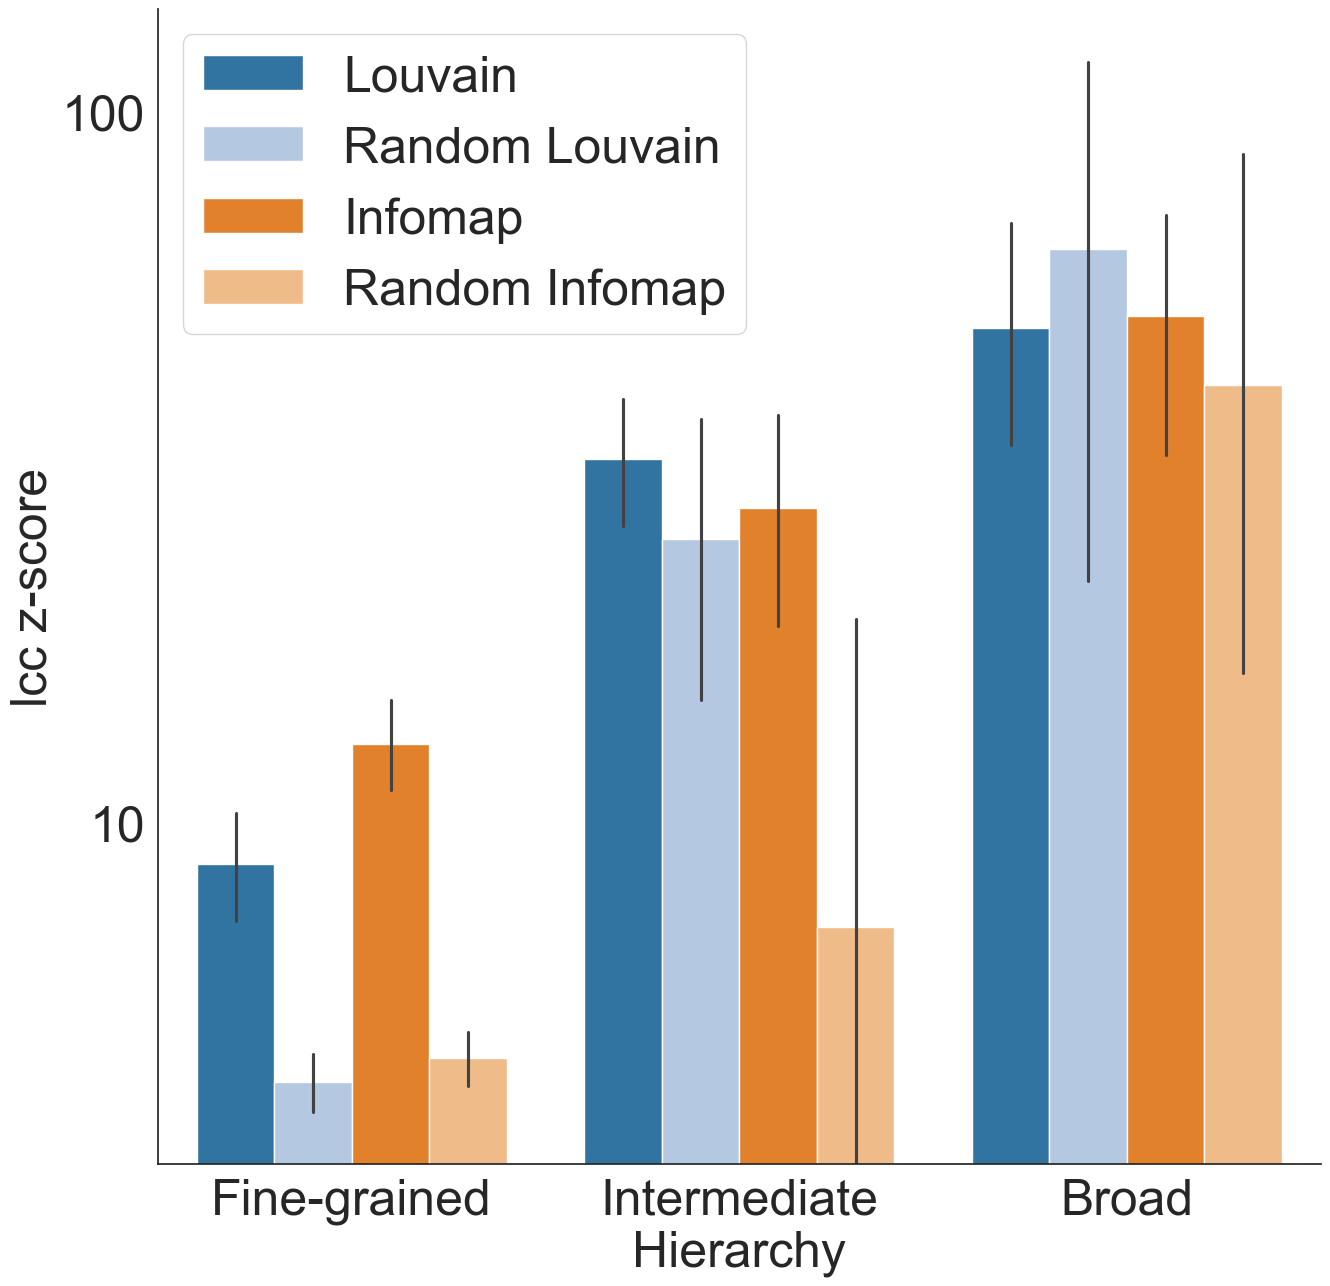

In [18]:

com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,z in sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOBP_random_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOMF_random_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOCC_random_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOBP_random_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Infomap")


for com,z in sig_enr_GOMF_random_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Infomap")

for com,z in sig_enr_GOCC_random_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Random Infomap")


for com,z in sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOBP_random_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOMF_random_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOCC_random_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOBP_random_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Infomap")


for com,z in sig_enr_GOMF_random_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Infomap")

for com,z in sig_enr_GOCC_random_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Random Infomap")


for com,z in sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")

for com,z in sig_enr_GOBP_random_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOMF_random_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOCC_random_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Louvain")

for com,z in sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")

for com,z in sig_enr_GOBP_random_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Infomap")


for com,z in sig_enr_GOMF_random_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Infomap")

for com,z in sig_enr_GOCC_random_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Random Infomap")



com_size_df['Hierarchy']=status_list
com_size_df['lcc z-score']=num_terms_list
com_size_df['Type']=level_list

com_size_df = com_size_df.replace('nan', -2)
com_size_df = com_size_df.dropna(subset=['lcc z-score'])  # Drop rows with NaN in 'lcc z-score'

palette = {
    "Louvain": "#1f77b4",        # blue
    "Random Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "Random Infomap": "#ffbb78"  # light orange
}

# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='lcc z-score', hue='Type',estimator=np.mean, data=com_size_df,palette=palette)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('lcc z-score', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Supplementary_lcc_zscore_Network_Type.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()


In [19]:
com_size_df["Color"] = com_size_df["Type"].map(palette)

# Append to your existing SourceData Excel
excel_path = "output/Source_Data_exposurome.xlsx"

with pd.ExcelWriter(
        excel_path,
        engine="openpyxl",
        mode="a",
        if_sheet_exists="replace"
    ) as writer:
    com_size_df.to_excel(
        writer,
        sheet_name="SF12F",
        index=False
    )